## Importing Dataframe

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder 

df = pd.read_csv('breast-cancer.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Line and Column Description

In [27]:
df.describe

<bound method NDFrame.describe of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181

## ETL and Processing

In [46]:
x = df.iloc[:,2:]
y_label = y = df.iloc[:,1]

#print(y_label)
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y_label)

print(x.shape)

(569, 30)


## Histograms

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [40]:
model = [LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis(),GaussianNB()]

n_repeats = 100
test_size = 0.2

final_score = []
for i in range(3):
    scores = [] 
    for _ in range(n_repeats):
        X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=test_size, random_state=None,stratify=y)
        model[i].fit(X_train,y_train)
        y_pred= model[i].predict(X_test)
        scores.append(accuracy_score(y_test,y_pred))
    final_score.append(scores) 


print(final_score)

C:\Users\Junio\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\Junio\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\Junio\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\Junio\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is 

[[0.9385964912280702, 0.9122807017543859, 0.9649122807017544, 0.9385964912280702, 0.956140350877193, 0.9298245614035088, 0.956140350877193, 0.9736842105263158, 0.9736842105263158, 0.9649122807017544, 0.9298245614035088, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.9649122807017544, 0.9385964912280702, 0.9649122807017544, 0.9385964912280702, 0.9649122807017544, 0.9649122807017544, 0.9649122807017544, 0.9824561403508771, 0.956140350877193, 0.9298245614035088, 0.9298245614035088, 0.9912280701754386, 0.9473684210526315, 0.9473684210526315, 0.9736842105263158, 0.9385964912280702, 0.9649122807017544, 0.9649122807017544, 0.9736842105263158, 0.9736842105263158, 0.956140350877193, 0.9298245614035088, 0.956140350877193, 0.9912280701754386, 0.9649122807017544, 0.9473684210526315, 0.9210526315789473, 0.9649122807017544, 0.9473684210526315, 0.9736842105263158, 0.956140350877193, 0.956140350877193, 0.9736842105263158, 0.956140350877193, 0.9736842105263158, 0.964912

In [17]:
#model[1] = QuadraticDiscriminantAnalysis()
#model[2] = GaussianNB()

print(model[0])

LinearDiscriminantAnalysis()


## Histogram Plot

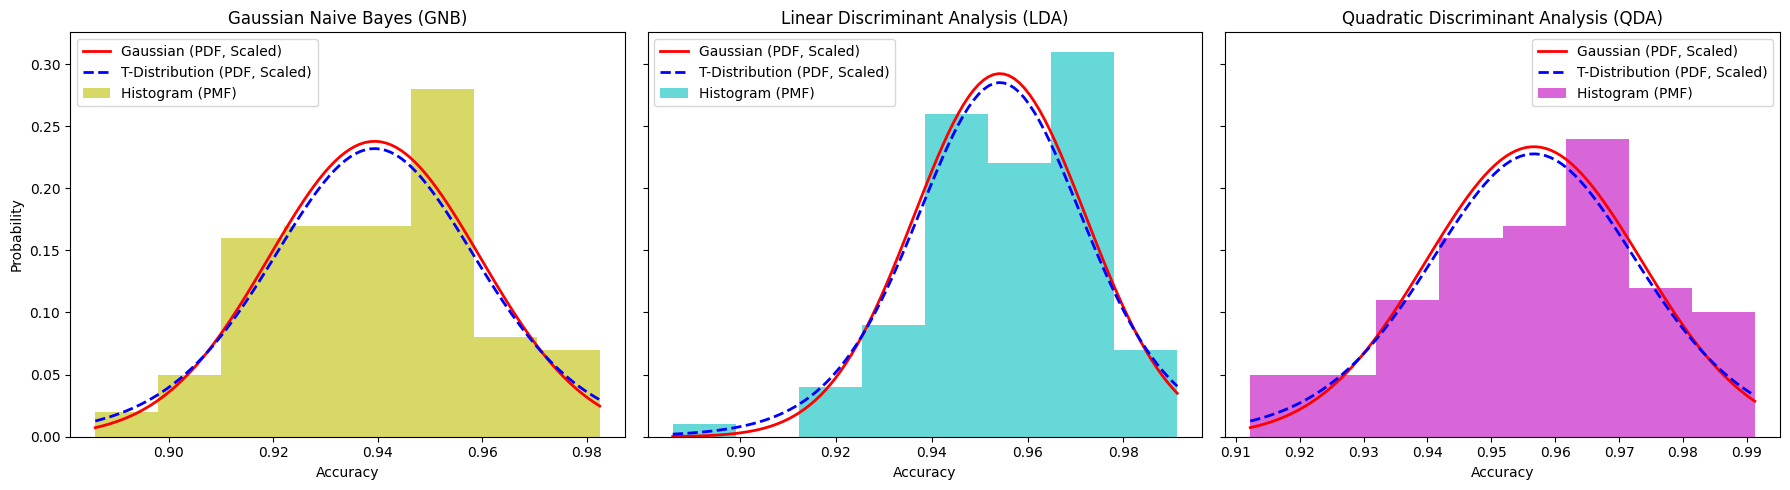

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

# Define the number of repeats for Monte Carlo Cross-Validation
#n_repeats = 100
#test_size = 0.1

# Replace these with actual scores data

scores_LDA = np.array(final_score[0])
scores_QDA = np.array(final_score[1])
scores_GNB = np.array(final_score[2])

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Titles for each model
titles = ['Gaussian Naive Bayes (GNB)', 'Linear Discriminant Analysis (LDA)', 'Quadratic Discriminant Analysis (QDA)']
scores_list = [scores_GNB, scores_LDA, scores_QDA]
colors = ['y', 'c', 'm']  # Different colors for histograms

for i, (scores, ax, title, color) in enumerate(zip(scores_list, axes, titles, colors)):
    # Compute statistics
    mean_score = scores.mean()
    std_score = scores.std()
    n_dof = 10
    #n_dof = n_repeats - 1
    # Compute histogram (PMF)
    bins = 8
    counts, bin_edges = np.histogram(scores, bins=bins, density=False)
    pmf = counts / counts.sum()
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    bin_width = bin_edges[1] - bin_edges[0]

    # Plot histogram as PMF
    ax.bar(bin_centers, pmf, width=bin_width, alpha=0.6, color=color, label='Histogram (PMF)')

    # Compute and plot PDFs
    x = np.linspace(min(scores), max(scores), 100)
    pdf_gaussian = norm.pdf(x, mean_score, std_score) * bin_width
    pdf_t = t.pdf(x, n_dof , mean_score, std_score) * bin_width

    ax.plot(x, pdf_gaussian, 'r-', lw=2, label='Gaussian (PDF, Scaled)')
    ax.plot(x, pdf_t, 'b', lw=2,linestyle='--', label="T-Distribution (PDF, Scaled)")

    # Titles and labels
    ax.set_title(title)
    ax.set_xlabel('Accuracy')
    if i == 0:
        ax.set_ylabel('Probability')
    ax.legend()

# Adjust layout and show plot
plt.tight_layout()
plt.show()


## Pearson Correlation

In [55]:
line = x.iloc[0,:]
print(line.shape)
correlation = np.zeros((len(line),len(line)))
for i in range(len(line)):
    for j in range(len(line),len(line)-i,-1):
        correlation[i,j] = line[i].corr(line[j]) #dataframe column correlation -> pandas

(30,)


C:\Users\Junio\AppData\Local\Temp\ipykernel_16796\2488118401.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  correlation[i,j] = line[i].corr(line[j])


AttributeError: 'numpy.float64' object has no attribute 'corr'